# Stand-alone of `get_AM_mod.py`

## Import modules


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os

import calendar
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib inline

from get_AM_mod import JRA55, CMIP6, ERA5, NAM, SAM
from tools_AM_mod import cov_lag, find_event

In [2]:
from get_AM_mod import MyDataSet_test, MyGetData_test, get_y_test
# MyDataSet_test()
# MyGetData_test()
get_y_test()

Testing get_y function ......
Calculating from the original data .......
ERA5 (65, 365, 7) 	calendar: 365_day
t.shape = (150,), y.shape = (64, 150, 7), y2.shape = (64, 230, 7)
t.shape = (150,), y.shape = (64, 150, 7), y2.shape = (64, 230, 7)


In [3]:
# from tools_AM_mod import find_idx_event_test

# find_idx_event_test()


## Plot the AM index on a pressure level for a year

Reading from saved data ......
Reading from saved data ......


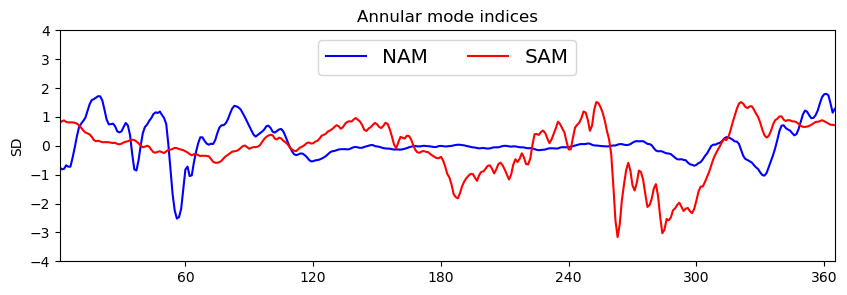

In [4]:
def plot_1year(index, year=2007, p_level=10, color='b-'):
        time = np.linspace(1.0, 365, 365)
        yi = year - index.data.year_start  # python array starts from zero!
        ki = np.isin(index.data.level, p_level)
        ysize = 365

        ax1.plot(time, index.index.reshape(-1, data.num_levels)[yi*ysize:(yi+1)*ysize, ki], color, label=index.index_name)
        legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=3)
        ax1.set_xticks(np.linspace(60, 360, 6))
        ax1.set_ylabel('SD')
        ax1.set_title('Annular mode indices')
        ax1.axis([1, 365, -4, 4])
        #ax1.axhline(y=0, color='k', linestyle='--')
        ax1.grid()


# data = JRA55(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55')
data = ERA5(name_dir='ERA5', year_start=1950, year_end=2021, source_dir='cmip6')
NAM_index = NAM(data, index_name='NAM', annual_cycle_fft=3, running_mean=0, save_index=False)
SAM_index = SAM(data, index_name='SAM', annual_cycle_fft=3, running_mean=0, save_index=False)

fig = plt.figure(figsize=(10,3)) # size is optional
ax1 = fig.add_subplot(1,1,1)
plot_1year(NAM_index, year=2007, p_level=10, color='b-')
plot_1year(SAM_index, year=2007, p_level=10, color='r-')


## Plot the AM index on three pressure levels for two years

Reading from saved data ......


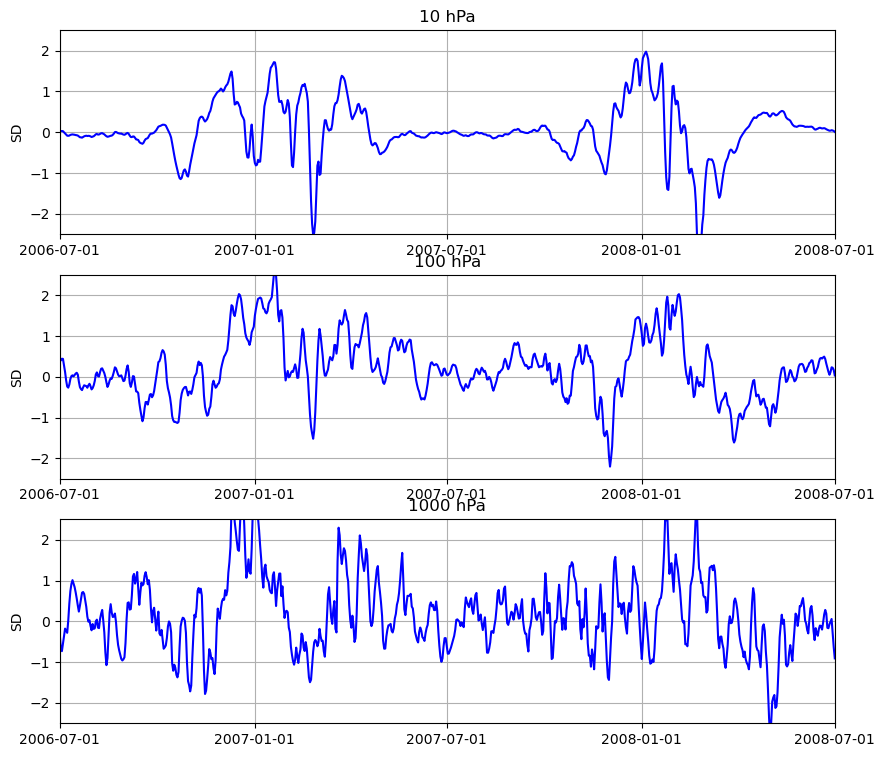

In [5]:
def plot_2year(index, year=2006, p_level=[10, 100, 1000], color='b-'):
        
        d0 = pd.Timestamp(year, 1, 1)
        d_start = pd.Timestamp(year, 7, 1)
        d_end = pd.Timestamp(year+2, 7, 1)
        t = np.linspace(d_start.value, d_end.value, ((d_end-d_start).days+1))
        t = pd.to_datetime(t)
        time = mdates.date2num(t)

        yi = year-index.data.year_start  # python array starts from zero!
        kk = np.isin(index.data.level, p_level).nonzero()[0]

        fig = plt.figure(figsize=(10,9)) # size is optional
        for ii in range(1,4):
            ax1 = fig.add_subplot(3,1,ii)
            ax1.plot(time, index.index.reshape(-1, data.num_levels)[(yi*365+(d_start-d0).days):(yi*365+(d_end-d0).days+1), kk[ii-1]], \
                color, label=index.index_name)
            #legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=3)
            ax1.set_ylabel('SD')
            ax1.set_title(str(p_level[ii-1]) +' hPa')
            ax1.axis([time[0], time[-1], -2.5, 2.5])
            #ax1.axhline(y=0, color='k', linestyle='--')
            ax1.grid()
            ax1.set_xticks(mpl.dates.date2num([dt.date(year, 7, 1),
                                               dt.date(year+1, 1, 1), dt.date(year+1, 7, 1),
                                               dt.date(year+2, 1, 1), dt.date(year+2, 7, 1)
                                              ]))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            #plt.gcf().autofmt_xdate()

# data = JRA55(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55')
data = ERA5(name_dir='ERA5', year_start=1950, year_end=2021, source_dir='cmip6')
NAM_index = NAM(data, index_name='NAM', annual_cycle_fft=3, running_mean=0, save_index=False)
plot_2year(NAM_index, year=2006, p_level=[10, 100, 1000])


## Compare the AM index with fft_filtering, and running mean

Calculating from the original data .......
Calculating from the original data .......
Calculating from the original data .......
Calculating from the original data .......


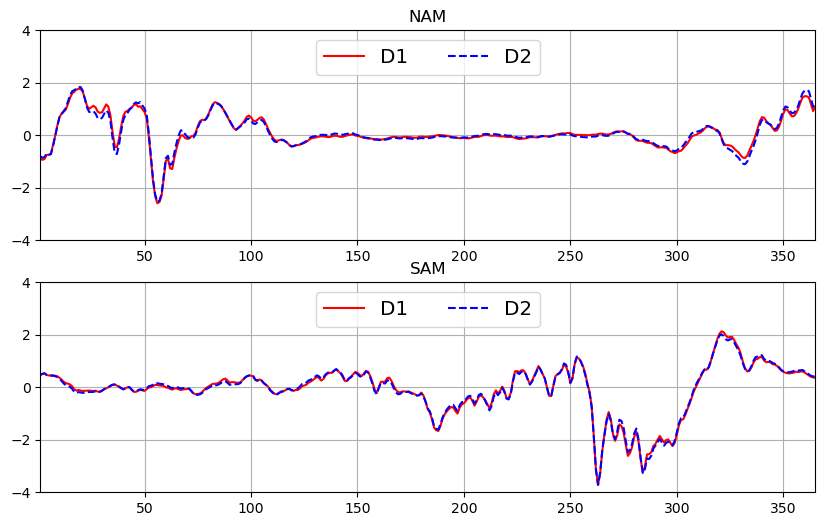

In [6]:
# data = JRA55(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55')
data = ERA5(name_dir='ERA5', year_start=1950, year_end=2021, source_dir='cmip6')
NAM_index = NAM(data, index_name='NAM', annual_cycle_fft=0, running_mean=0, save_index=False)
SAM_index = SAM(data, index_name='SAM', annual_cycle_fft=0, running_mean=0, save_index=False)

NAM_index1 = NAM(data, index_name='NAM', annual_cycle_fft=4, running_mean=0, save_index=False)
SAM_index1 = SAM(data, index_name='SAM', annual_cycle_fft=4, running_mean=0, save_index=False)

k = np.isin(data.level, 10)
year = 2007
yi = year - data.year_start
time1 = np.linspace(1.0, 365, 365)
time2 = np.linspace(1.0, 365, 365)

fig = plt.figure(figsize=(10,6)) # size is optional
ax1 = fig.add_subplot(2,1,1)
ax1.plot(time1, NAM_index.index.reshape(-1, data.num_levels)[yi*365:(yi+1)*365, k], 'r', label='D1')
ax1.plot(time2, NAM_index1.index.reshape(-1, data.num_levels)[yi*365:(yi+1)*365, k], 'b--', label='D2')
legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=2)
ax1.axis([1, 365, -4, 4])
ax1.set_title('NAM')
ax1.grid()

ax1 = fig.add_subplot(2,1,2)
ax1.plot(time1, SAM_index.index.reshape(-1, data.num_levels)[yi*365:(yi+1)*365, k], 'r', label='D1')
ax1.plot(time2, SAM_index1.index.reshape(-1, data.num_levels)[yi*365:(yi+1)*365, k], 'b--', label='D2')
legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=2)
ax1.axis([1, 365, -4, 4])
ax1.set_title('SAM')
ax1.grid()

## Plot the covariance function

Reading from saved data ......


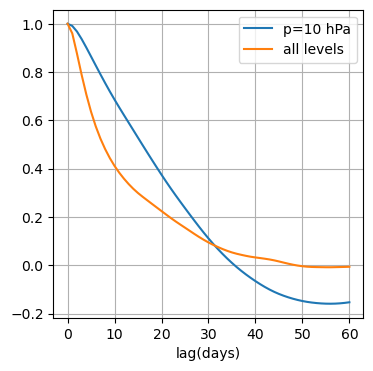

In [7]:
# data = JRA55(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55')
data = ERA5(name_dir='ERA5', year_start=1950, year_end=2021, source_dir='cmip6')
NAM_index = NAM(data, index_name='NAM', annual_cycle_fft=3, running_mean=0, save_index=False)

lag_time = 60
lags = np.arange(0, lag_time+1)

p_level = 10
k = np.isin(data.level, p_level)
Ct = np.array([cov_lag(NAM_index.index.reshape(-1, data.num_levels)[:, k][None, :], lag) for lag in lags])

Ct_all = np.array([np.trace(cov_lag(NAM_index.index.reshape(-1, data.num_levels)[None, :, :], lag)) for lag in lags])

fig = plt.figure(figsize=(4,4))
plt.plot(lags, Ct, label=f"p={p_level:.0f} hPa")
plt.plot(lags, Ct_all/Ct_all[0], label='all levels')
plt.gca().grid()
plt.xlabel('lag(days)')
plt.legend()

## Plot lagged regression


Reading from saved data ......


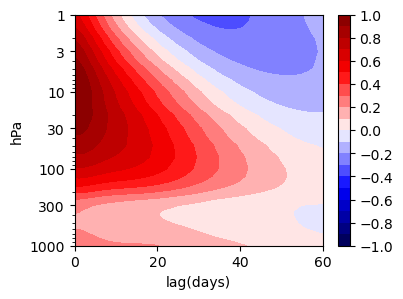

In [8]:
# lagged regression
def cal_Ct_p(index, p_level):
    k = np.isin(index.data.level, p_level)
    Ct_p = np.array([cov_lag(index.index.reshape(-1, data.num_levels)[None, :, :], lag, \
                             index.index.reshape(-1, data.num_levels)[:, k][None, :]) for lag in lags])
    return Ct_p

# data = JRA55(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55')
data = ERA5(name_dir='ERA5', year_start=1950, year_end=2021, source_dir='cmip6')
NAM_index = NAM(data, index_name='NAM', annual_cycle_fft=3, running_mean=0, save_index=False)

lag_time = 60
lags = np.arange(0, lag_time+1)

Ct_p = cal_Ct_p(NAM_index, p_level=10)

cmax = 1
cm = 'seismic' # 'bwr'
fig = plt.figure(figsize=(4,3))
plt.contourf(lags, data.level, Ct_p.T, np.linspace(-cmax, cmax, 21), cmap=cm)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1000])
plt.ylabel('hPa')
plt.xlabel('lag(days)')
cbar = plt.colorbar()
cbar.set_ticks(np.linspace(-cmax, cmax, 11))
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())


## Make composite for strong and weak vortex events


Reading from saved data ......
# of events: 38(38.00)
# of events: 109(109.00)


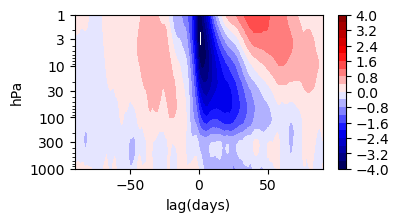

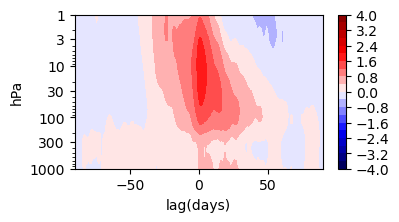

In [9]:
# data = JRA55(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55')
data = ERA5(name_dir='ERA5', year_start=1950, year_end=2021, source_dir='cmip6')
NAM_index = NAM(data, index_name='NAM', annual_cycle_fft=3, running_mean=0, save_index=False)

y = NAM_index.index.reshape(-1, data.num_levels)[None, :, :]
lag_time = 90
lags = np.arange(-lag_time, lag_time+1)

y_neg_event, y_num = find_event(y[:, lag_time:,:], data.level, y2=y, threshold=-3, lag_time=lag_time)

cmax = 4
cm = 'seismic' # 'bwr'
fig = plt.figure(figsize=(4,2))
plt.contourf(lags, data.level, y_neg_event.T, np.linspace(-cmax, cmax, 21), cmap=cm)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1000])
plt.ylabel('hPa')
plt.xlabel('lag(days)')
cbar = plt.colorbar()
cbar.set_ticks(np.linspace(-cmax, cmax, 11))
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

y_neg_event, y_num = find_event(y[:, lag_time:,:], data.level, y2=y, threshold=1.5, lag_time=lag_time)

cmax = 4
cm = 'seismic' # 'bwr'
fig = plt.figure(figsize=(4,2))
plt.contourf(lags, data.level, y_neg_event.T, np.linspace(-cmax, cmax, 21), cmap=cm)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1000])
plt.ylabel('hPa')
plt.xlabel('lag(days)')
cbar = plt.colorbar()
cbar.set_ticks(np.linspace(-cmax, cmax, 11))
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
